In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [84]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, roc_auc_score, roc_curve, auc

In [64]:
df = pd.read_csv('/home/ubuntu/MIMICmaterialized/oasis.csv')

In [7]:
df_flag = df[['icustay_id', 'icustay_age_group','icustay_expire_flag']].copy()

In [12]:
df_flag

,icustay_id,icustay_age_group,icustay_expire_flag
0,200001,adult,0
1,200003,adult,0
2,200006,adult,0
3,200007,adult,0
4,200009,adult,0
5,200010,adult,0
6,200011,adult,0
7,200012,adult,0
8,200014,adult,0
9,200016,adult,0


In [4]:
df.describe(include='all')

,subject_id,hadm_id,icustay_id,icustay_age_group,hospital_expire_flag,icustay_expire_flag,oasis,oasis_prob,age,age_score,...,resprate,resprate_score,temp,temp_score,urineoutput,urineoutput_score,mechvent,mechvent_score,electivesurgery,electivesurgery_score
count,61532.000000,61532.000000,61532.000000,61532,61532.000000,61532.000000,61532.000000,61532.000000,61532.000000,61532.000000,...,52229.000000,52229.000000,51382.000000,51382.000000,53201.000000,53201.000000,61532.000000,61532.000000,61532.000000,61532.000000
unique,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,adult,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,53431,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,33888.605912,149954.470649,249962.710248,NaN,0.107408,0.075099,29.650475,0.130883,64.470552,4.997741,...,24.687757,2.466446,36.463895,2.714161,1820.675878,3.526005,0.400978,3.608805,0.107408,5.355555
std,28127.690913,28898.895904,28890.574867,NaN,0.309633,0.263553,9.811180,0.138882,56.913254,2.820875,...,9.816155,2.661418,1.248250,1.057916,2842.279356,3.663245,0.490101,4.410906,0.309633,1.857799
min,2.000000,100001.000000,200001.000000,NaN,0.000000,0.000000,0.000000,0.002077,0.000000,0.000000,...,0.200000,0.000000,15.000000,0.000000,-2600.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12047.500000,124933.750000,224935.500000,NaN,0.000000,0.000000,23.000000,0.037612,44.000000,3.000000,...,19.000000,1.000000,35.666667,2.000000,876.000000,1.000000,0.000000,0.000000,0.000000,6.000000
50%,24280.500000,149911.500000,249940.000000,NaN,0.000000,0.000000,29.000000,0.077479,62.000000,6.000000,...,26.000000,1.000000,36.111111,2.000000,1580.000000,1.000000,0.000000,0.000000,0.000000,6.000000
75%,54191.500000,174997.250000,274972.500000,NaN,0.000000,0.000000,36.000000,0.170145,76.000000,6.000000,...,30.000000,6.000000,37.388889,4.000000,2470.000000,5.000000,1.000000,9.000000,0.000000,6.000000


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61532 entries, 0 to 61531
Data columns (total 28 columns):
subject_id               61532 non-null int64
hadm_id                  61532 non-null int64
icustay_id               61532 non-null int64
icustay_age_group        61532 non-null object
hospital_expire_flag     61532 non-null int64
icustay_expire_flag      61532 non-null int64
oasis                    61532 non-null int64
oasis_prob               61532 non-null float64
age                      61532 non-null int64
age_score                61532 non-null int64
preiculos                61532 non-null object
preiculos_score          61532 non-null int64
gcs                      52143 non-null float64
gcs_score                52143 non-null float64
heartrate                59048 non-null float64
heartrate_score          59048 non-null float64
meanbp                   52288 non-null float64
meanbp_score             52288 non-null float64
resprate                 52229 non-null float64

In [66]:
df_adult = df.loc[df['icustay_age_group'] == 'adult']

In [67]:
df_adult.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53431 entries, 0 to 61531
Data columns (total 28 columns):
subject_id               53431 non-null int64
hadm_id                  53431 non-null int64
icustay_id               53431 non-null int64
icustay_age_group        53431 non-null object
hospital_expire_flag     53431 non-null int64
icustay_expire_flag      53431 non-null int64
oasis                    53431 non-null int64
oasis_prob               53431 non-null float64
age                      53431 non-null int64
age_score                53431 non-null int64
preiculos                53431 non-null object
preiculos_score          53431 non-null int64
gcs                      52142 non-null float64
gcs_score                52142 non-null float64
heartrate                52293 non-null float64
heartrate_score          52293 non-null float64
meanbp                   52287 non-null float64
meanbp_score             52287 non-null float64
resprate                 52228 non-null float64

In [68]:
len(df_adult['subject_id'].unique())

38605

In [49]:
len(df_adult_dropped['subject_id'].unique())

37172

In [54]:
len(df_adult['icustay_id'].unique())

53431

In [53]:
len(df_adult_dropped['icustay_id'].unique())

48785

In [8]:
df_adult.describe(include='all')

,subject_id,hadm_id,icustay_id,icustay_age_group,hospital_expire_flag,icustay_expire_flag,oasis,oasis_prob,age,age_score,...,resprate,resprate_score,temp,temp_score,urineoutput,urineoutput_score,mechvent,mechvent_score,electivesurgery,electivesurgery_score
count,53431.000000,53431.000000,53431.000000,53431,53431.000000,53431.000000,53431.000000,53431.000000,53431.000000,53431.000000,...,52228.000000,52228.000000,51381.000000,51381.000000,49729.000000,49729.000000,53431.000000,53431.000000,53431.000000,53431.000000
unique,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,adult,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,53431,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36653.934570,149971.670996,250015.705845,NaN,0.122494,0.085288,31.021916,0.143038,74.245064,5.755479,...,24.687751,2.466474,36.463870,2.714175,1941.832105,3.074182,0.428197,3.853774,0.123692,5.257847
std,28987.770125,28930.407384,28910.150685,NaN,0.327859,0.279312,9.137619,0.143596,54.813507,2.191481,...,9.816248,2.661435,1.248250,1.057921,2901.274107,3.350603,0.494822,4.453399,0.329233,1.975399
min,3.000000,100001.000000,200001.000000,NaN,0.000000,0.000000,0.000000,0.002077,15.000000,0.000000,...,0.200000,0.000000,15.000000,0.000000,-2600.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13215.500000,124880.000000,224951.000000,NaN,0.000000,0.000000,25.000000,0.048012,52.000000,3.000000,...,19.000000,1.000000,35.666667,2.000000,1020.000000,1.000000,0.000000,0.000000,0.000000,6.000000
50%,26579.000000,150011.000000,250016.000000,NaN,0.000000,0.000000,30.000000,0.087098,65.000000,6.000000,...,26.000000,1.000000,36.111111,2.000000,1675.000000,1.000000,0.000000,0.000000,0.000000,6.000000
75%,59889.000000,175054.500000,275072.000000,NaN,0.000000,0.000000,37.000000,0.188911,77.000000,6.000000,...,30.000000,6.000000,37.388889,4.000000,2550.000000,5.000000,1.000000,9.000000,0.000000,6.000000


In [69]:
df_adult_dropped = df_adult.dropna().copy()

In [1]:
df_adult_dropped

NameError: name 'df_adult_dropped' is not defined

In [70]:
df_adult_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48785 entries, 0 to 61531
Data columns (total 28 columns):
subject_id               48785 non-null int64
hadm_id                  48785 non-null int64
icustay_id               48785 non-null int64
icustay_age_group        48785 non-null object
hospital_expire_flag     48785 non-null int64
icustay_expire_flag      48785 non-null int64
oasis                    48785 non-null int64
oasis_prob               48785 non-null float64
age                      48785 non-null int64
age_score                48785 non-null int64
preiculos                48785 non-null object
preiculos_score          48785 non-null int64
gcs                      48785 non-null float64
gcs_score                48785 non-null float64
heartrate                48785 non-null float64
heartrate_score          48785 non-null float64
meanbp                   48785 non-null float64
meanbp_score             48785 non-null float64
resprate                 48785 non-null float64

In [11]:
df_adult_dropped.describe(include='all')

,subject_id,hadm_id,icustay_id,icustay_age_group,hospital_expire_flag,icustay_expire_flag,oasis,oasis_prob,age,age_score,...,resprate,resprate_score,temp,temp_score,urineoutput,urineoutput_score,mechvent,mechvent_score,electivesurgery,electivesurgery_score
count,48785.000000,48785.000000,48785.000000,48785,48785.000000,48785.000000,48785.000000,48785.000000,48785.000000,48785.000000,...,48785.000000,48785.000000,48785.000000,48785.000000,48785.000000,48785.000000,48785.000000,48785.000000,48785.000000,48785.000000
unique,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,adult,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,48785,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,37026.394384,149943.232776,250044.560029,NaN,0.116778,0.080701,31.558184,0.148383,74.264364,5.746910,...,24.678115,2.450548,36.468464,2.713047,1947.167444,3.064159,0.436302,3.926719,0.123214,5.260715
std,29099.517506,28902.844359,28922.604907,NaN,0.321158,0.272378,8.905333,0.145724,55.050679,2.199299,...,9.794704,2.647823,1.247130,1.054924,2924.587759,3.343896,0.495931,4.463380,0.328686,1.972117
min,3.000000,100001.000000,200001.000000,NaN,0.000000,0.000000,4.000000,0.003455,15.000000,0.000000,...,0.200000,0.000000,15.000000,0.000000,-2600.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13373.000000,124884.000000,224961.000000,NaN,0.000000,0.000000,25.000000,0.048012,52.000000,3.000000,...,19.000000,1.000000,35.666667,2.000000,1023.000000,1.000000,0.000000,0.000000,0.000000,6.000000
50%,26928.000000,149941.000000,250147.000000,NaN,0.000000,0.000000,31.000000,0.097783,65.000000,6.000000,...,26.000000,1.000000,36.111111,2.000000,1680.000000,1.000000,0.000000,0.000000,0.000000,6.000000
75%,60667.000000,175004.000000,275131.000000,NaN,0.000000,0.000000,37.000000,0.188911,77.000000,6.000000,...,30.000000,6.000000,37.388891,4.000000,2559.000000,5.000000,1.000000,9.000000,0.000000,6.000000


In [12]:
df_scores_hos = df_adult_dropped[['age_score', 'preiculos_score',\
                      'gcs_score', 'heartrate_score', 'meanbp_score', \
                 'resprate_score', 'temp_score', 'urineoutput_score', 'mechvent_score',\
                      'electivesurgery_score', 'hospital_expire_flag']].copy()

In [71]:
df_scores_icu = df_adult_dropped[['age_score', 'preiculos_score',\
                      'gcs_score', 'heartrate_score', 'meanbp_score', \
                 'resprate_score', 'temp_score', 'urineoutput_score', 'mechvent_score',\
                      'electivesurgery_score', 'icustay_expire_flag']].copy()

In [13]:
y = df_scores_hos.pop('hospital_expire_flag')

In [72]:
y = df_scores_icu.pop('icustay_expire_flag')

In [14]:
y

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
12       1
14       0
17       0
18       0
19       1
20       0
21       0
22       1
23       0
24       1
25       0
27       0
28       0
29       0
30       0
31       0
32       0
36       0
37       0
38       0
        ..
61493    0
61495    0
61496    0
61497    0
61498    0
61499    0
61500    0
61503    0
61505    0
61506    0
61509    0
61510    0
61512    0
61513    0
61515    0
61516    0
61517    0
61518    1
61519    0
61520    0
61521    0
61522    0
61523    0
61524    0
61525    0
61526    0
61527    0
61529    0
61530    0
61531    0
Name: hospital_expire_flag, Length: 48785, dtype: int64

In [73]:
X = df_scores_icu.copy()

In [36]:
X.shape

(48785, 10)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.33,
                                                    random_state=0,
                                                   stratify=y)

In [75]:
# Train and fit model                                                   
rf = RandomForestClassifier(random_state=0,n_jobs=-1,n_estimators=300 )

rf.fit(X_train, y_train)
                                     
# Test Prediction
pred = rf.predict(X_test)
print('Accuracy score: {:.3}'.format(rf.score(X_test, y_test)))

Accuracy score: 0.914


In [76]:
y_predict_proba = rf.predict_proba(X_test)

In [40]:
y_pred = rf.predict(X_test)

In [21]:
roc_auc_score(y_test, y_pred)

0.6000983780710416

In [77]:
y_proba = y_predict_proba[:,1]

In [78]:
roc_auc_score(y_test, y_proba)

0.80206190945111744

In [80]:
# Calculate Standard Mortality Rate (SMR) 
SMR = sum(y_test)/sum(pred)
print('SMR: {:.3}'.format(SMR))

# Calculate Brier score
difference = y_proba - y_test
squared = np.square(difference)
Brier = np.mean(squared)
print('Brier Score: {:.3}'.format(Brier))

SMR: 1.92
Brier Score: 0.0692


In [82]:
# Calculate Standard Mortality Rate (SMR) 

print('SMR: {:.3}'.format(sum(y_test)/sum(pred)))

# Calculate Brier score
 

print('Brier Score: {:.3}'.format(np.mean(np.square(y_proba - y_test))))

SMR: 1.92
Brier Score: 0.0692


In [81]:
sum(y_test)/sum(y_proba)

0.96701071302865838

In [24]:
rf.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)>

In [ ]:
param_grid = {'oob_score': [True, False],
            'n_estimators': [10, 20, 50, 100, 300, 1000],
            "max_depth": [3, None],
              "max_features": [1, 3, 10, 'sqrt', 'log2'],
              "min_samples_split": [2, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [67]:
n_estimators =  [10, 20, 50, 100, 300, 1000, 2000, 5000, 10000]
for i in n_estimators:
    rf1 = RandomForestClassifier(n_estimators = i, random_state=0,n_jobs=-1)
    rf1.fit(X_train, y_train)
    y_predict_proba = rf1.predict_proba(X_test)
    y_proba = y_predict_proba[:,1]
    print(i, roc_auc_score(y_test, y_proba), '\n''\n')


10 0.759760656373 


20 0.775405834416 


50 0.788425911551 


100 0.7955600497 


300 0.80206203948 


1000 0.802537685098 


2000 0.804656193517 


5000 0.805891571835 


10000 0.806230427079 




In [29]:
n_estimators =  [10, 20, 50, 100, 300, 400, 500, 600, 700, 800, 900]
for i in n_estimators:
    rf1 = RandomForestClassifier(n_estimators = i, random_state=0,n_jobs=-1)
    rf1.fit(X_train, y_train)
    y_predict_proba = rf1.predict_proba(X_test)
    y_proba = y_predict_proba[:,1]
    print(i, roc_auc_score(y_test, y_proba), '\n''\n')

10 0.727446210013 


20 0.744407823862 


50 0.752239354221 


100 0.754913909836 


300 0.757009400156 


400 0.757136188168 


500 0.75701983646 


600 0.757212870695 


700 0.757311922076 


800 0.757661276446 


900 0.757888668193 




In [30]:
max_features =  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 'sqrt', 'log2', 'auto']
for i in max_features:
    rf1 = RandomForestClassifier(n_estimators = 300, max_features = i, random_state=0,n_jobs=-1)
    rf1.fit(X_train, y_train)
    y_predict_proba = rf1.predict_proba(X_test)
    y_proba = y_predict_proba[:,1]
    print(i, roc_auc_score(y_test, y_proba), '\n''\n')

1 0.758863939013 


2 0.757544270132 


3 0.757009418859 


4 0.75485712736 


5 0.753561454499 


6 0.753570039202 


7 0.752999764342 


8 0.752366441482 


9 0.753048223958 


10 0.751185212616 


sqrt 0.75700954978 


log2 0.757009456265 


auto 0.757009624592 




In [34]:
df1 = pd.read_csv('/home/ubuntu/MIMICmaterialized/apsiii.csv')

In [35]:
df1

,subject_id,hadm_id,icustay_id,apsiii,apsiii_prob,hr_score,meanbp_score,temp_score,resprate_score,pao2_aado2_score,...,wbc_score,creatinine_score,uo_score,bun_score,sodium_score,albumin_score,bilirubin_score,glucose_score,acidbase_score,gcs_score
0,55973,152234,200001,63,0.188678,7.0,7.0,0.0,6.0,0.0,...,5.0,7.0,15.0,12.0,0.0,NaN,0.0,0.0,1.0,0.0
1,27513,163557,200003,48,0.102705,7.0,10.0,0.0,9.0,NaN,...,5.0,0.0,0.0,7.0,0.0,0.0,6.0,0.0,1.0,0.0
2,10950,189514,200006,23,0.033927,0.0,7.0,0.0,6.0,NaN,...,0.0,0.0,4.0,0.0,0.0,NaN,NaN,3.0,NaN,0.0
3,20707,129310,200007,33,0.053332,1.0,15.0,0.0,6.0,NaN,...,0.0,0.0,5.0,0.0,0.0,0.0,NaN,3.0,NaN,0.0
4,29904,129607,200009,26,0.038894,1.0,7.0,8.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,NaN,NaN,0.0,3.0,0.0
5,11861,192256,200010,28,0.042586,5.0,9.0,0.0,8.0,NaN,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,3.0,NaN,0.0
6,93535,121562,200011,36,0.060960,0.0,7.0,0.0,6.0,0.0,...,0.0,7.0,0.0,11.0,0.0,NaN,NaN,0.0,2.0,0.0
7,28448,177527,200012,21,0.030962,1.0,6.0,0.0,6.0,NaN,...,0.0,0.0,5.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0
8,9514,127229,200014,50,0.111749,0.0,10.0,8.0,6.0,NaN,...,0.0,0.0,7.0,7.0,0.0,6.0,0.0,0.0,0.0,3.0
9,74032,117458,200016,25,0.037166,0.0,7.0,2.0,8.0,NaN,...,0.0,0.0,5.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0


In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61532 entries, 0 to 61531
Data columns (total 21 columns):
subject_id          61532 non-null int64
hadm_id             61532 non-null int64
icustay_id          61532 non-null int64
apsiii              61532 non-null int64
apsiii_prob         61532 non-null float64
hr_score            59048 non-null float64
meanbp_score        52288 non-null float64
temp_score          51382 non-null float64
resprate_score      52229 non-null float64
pao2_aado2_score    20359 non-null float64
hematocrit_score    59540 non-null float64
wbc_score           59170 non-null float64
creatinine_score    52900 non-null float64
uo_score            53201 non-null float64
bun_score           52890 non-null float64
sodium_score        54804 non-null float64
albumin_score       19325 non-null float64
bilirubin_score     26106 non-null float64
glucose_score       54452 non-null float64
acidbase_score      34373 non-null float64
gcs_score           51443 non-null floa

In [37]:
df1['albumin_score'].unique()

array([ nan,   0.,   6.,  11.,   4.])

In [11]:
sofa = pd.read_csv('/home/ubuntu/MIMICmaterialized/sofa.csv')
qsofa = pd.read_csv('/home/ubuntu/MIMICmaterialized/qsofa.csv')
lods = pd.read_csv('/home/ubuntu/MIMICmaterialized/lods.csv')
mlods = pd.read_csv('/home/ubuntu/MIMICmaterialized/mlods.csv')
sirs = pd.read_csv('/home/ubuntu/MIMICmaterialized/sirs.csv')
saps = pd.read_csv('/home/ubuntu/MIMICmaterialized/saps.csv')
sapsii = pd.read_csv('/home/ubuntu/MIMICmaterialized/sapsii.csv')

In [13]:
apsiii = pd.read_csv('/home/ubuntu/MIMICmaterialized/apsiii.csv')

In [83]:
sirs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61532 entries, 0 to 61531
Data columns (total 8 columns):
subject_id         61532 non-null int64
hadm_id            61532 non-null int64
icustay_id         61532 non-null int64
sirs               61532 non-null int64
temp_score         51382 non-null float64
heartrate_score    59048 non-null float64
resp_score         54086 non-null float64
wbc_score          59173 non-null float64
dtypes: float64(4), int64(4)
memory usage: 3.8 MB


In [12]:
sapsii.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61532 entries, 0 to 61531
Data columns (total 20 columns):
subject_id             61532 non-null int64
hadm_id                61532 non-null int64
icustay_id             61532 non-null int64
sapsii                 61532 non-null int64
sapsii_prob            61532 non-null float64
age_score              61532 non-null int64
hr_score               59048 non-null float64
sysbp_score            52254 non-null float64
temp_score             51382 non-null float64
pao2fio2_score         19882 non-null float64
uo_score               53201 non-null float64
bun_score              52819 non-null float64
wbc_score              59170 non-null float64
potassium_score        54871 non-null float64
sodium_score           54804 non-null float64
bicarbonate_score      54411 non-null float64
bilirubin_score        26106 non-null float64
gcs_score              52143 non-null float64
comorbidity_score      61532 non-null int64
admissiontype_score    61532 

In [10]:
saps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61532 entries, 0 to 61531
Data columns (total 19 columns):
subject_id           61532 non-null int64
hadm_id              61532 non-null int64
icustay_id           61532 non-null int64
saps                 61532 non-null int64
age_score            61532 non-null int64
hr_score             59048 non-null float64
sysbp_score          52254 non-null float64
resp_score           52229 non-null float64
temp_score           51382 non-null float64
uo_score             53201 non-null float64
vent_score           61532 non-null int64
bun_score            52890 non-null float64
hematocrit_score     59540 non-null float64
wbc_score            59170 non-null float64
glucose_score        54452 non-null float64
potassium_score      54871 non-null float64
sodium_score         54804 non-null float64
bicarbonate_score    54411 non-null float64
gcs_score            52143 non-null float64
dtypes: float64(13), int64(6)
memory usage: 8.9 MB


In [98]:
sirs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61532 entries, 0 to 61531
Data columns (total 8 columns):
subject_id         61532 non-null int64
hadm_id            61532 non-null int64
icustay_id         61532 non-null int64
sirs               61532 non-null int64
temp_score         51382 non-null float64
heartrate_score    59048 non-null float64
resp_score         54086 non-null float64
wbc_score          59173 non-null float64
dtypes: float64(4), int64(4)
memory usage: 3.8 MB


In [42]:
qsofa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61532 entries, 0 to 61531
Data columns (total 7 columns):
subject_id        61532 non-null int64
hadm_id           61532 non-null int64
icustay_id        61532 non-null int64
qsofa             61532 non-null int64
sysbp_score       52254 non-null float64
gcs_score         52143 non-null float64
resprate_score    52229 non-null float64
dtypes: float64(3), int64(4)
memory usage: 3.3 MB


In [43]:
qsofa

,subject_id,hadm_id,icustay_id,qsofa,sysbp_score,gcs_score,resprate_score
0,55973,152234,200001,2,1.0,0.0,1.0
1,27513,163557,200003,2,1.0,0.0,1.0
2,10950,189514,200006,2,1.0,0.0,1.0
3,20707,129310,200007,2,1.0,0.0,1.0
4,29904,129607,200009,2,1.0,0.0,1.0
5,11861,192256,200010,1,0.0,0.0,1.0
6,93535,121562,200011,1,0.0,0.0,1.0
7,28448,177527,200012,2,1.0,0.0,1.0
8,9514,127229,200014,2,1.0,0.0,1.0
9,74032,117458,200016,1,1.0,0.0,0.0


In [16]:
lods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61532 entries, 0 to 61531
Data columns (total 10 columns):
subject_id        61532 non-null int64
hadm_id           61532 non-null int64
icustay_id        61532 non-null int64
lods              61532 non-null int64
neurologic        52143 non-null float64
cardiovascular    59052 non-null float64
renal             49589 non-null float64
pulmonary         61532 non-null int64
hematologic       59300 non-null float64
hepatic           50748 non-null float64
dtypes: float64(5), int64(5)
memory usage: 4.7 MB


In [18]:
lods

,subject_id,hadm_id,icustay_id,lods,neurologic,cardiovascular,renal,pulmonary,hematologic,hepatic
0,55973,152234,200001,7,0.0,1.0,5.0,0,0.0,1.0
1,27513,163557,200003,3,0.0,1.0,1.0,0,0.0,1.0
2,10950,189514,200006,2,0.0,1.0,1.0,0,0.0,0.0
3,20707,129310,200007,2,0.0,1.0,1.0,0,0.0,0.0
4,29904,129607,200009,4,0.0,1.0,1.0,1,0.0,1.0
5,11861,192256,200010,1,0.0,0.0,1.0,0,0.0,0.0
6,93535,121562,200011,4,0.0,0.0,3.0,1,0.0,0.0
7,28448,177527,200012,1,0.0,0.0,1.0,0,0.0,NaN
8,9514,127229,200014,5,0.0,1.0,3.0,1,0.0,0.0
9,74032,117458,200016,3,0.0,1.0,1.0,0,0.0,1.0


In [7]:
len(lods['icustay_id'].unique())

61532

In [19]:
lods_merged = lods.merge(df_flag, on='icustay_id')

In [20]:
lods_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61532 entries, 0 to 61531
Data columns (total 12 columns):
subject_id             61532 non-null int64
hadm_id                61532 non-null int64
icustay_id             61532 non-null int64
lods                   61532 non-null int64
neurologic             52143 non-null float64
cardiovascular         59052 non-null float64
renal                  49589 non-null float64
pulmonary              61532 non-null int64
hematologic            59300 non-null float64
hepatic                50748 non-null float64
icustay_age_group      61532 non-null object
icustay_expire_flag    61532 non-null int64
dtypes: float64(5), int64(6), object(1)
memory usage: 6.1+ MB


In [21]:
# keep only adult cases
lods_adult = lods_merged.loc[df['icustay_age_group'] == 'adult']

# DECIDE ABOUT DROPPING NULL VALUES AND INSERT HERE





In [22]:
lods_adult.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53431 entries, 0 to 61531
Data columns (total 12 columns):
subject_id             53431 non-null int64
hadm_id                53431 non-null int64
icustay_id             53431 non-null int64
lods                   53431 non-null int64
neurologic             52142 non-null float64
cardiovascular         52297 non-null float64
renal                  49419 non-null float64
pulmonary              53431 non-null int64
hematologic            52544 non-null float64
hepatic                48384 non-null float64
icustay_age_group      53431 non-null object
icustay_expire_flag    53431 non-null int64
dtypes: float64(5), int64(6), object(1)
memory usage: 5.3+ MB


In [23]:
lods_dropped = lods_adult.dropna().copy()

In [24]:
lods_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45255 entries, 0 to 61531
Data columns (total 12 columns):
subject_id             45255 non-null int64
hadm_id                45255 non-null int64
icustay_id             45255 non-null int64
lods                   45255 non-null int64
neurologic             45255 non-null float64
cardiovascular         45255 non-null float64
renal                  45255 non-null float64
pulmonary              45255 non-null int64
hematologic            45255 non-null float64
hepatic                45255 non-null float64
icustay_age_group      45255 non-null object
icustay_expire_flag    45255 non-null int64
dtypes: float64(5), int64(6), object(1)
memory usage: 4.5+ MB


In [93]:
# create dataframe based on computed scores
lods_icu = lods_dropped[['neurologic','cardiovascular','renal','pulmonary','hematologic',\
                         'hepatic', 'icustay_expire_flag']].copy()

In [90]:
lods_icu

,neurologic,cardiovascular,renal,pulmonary,hematologic,hepatic,icustay_expire_flag
0,0.0,1.0,5.0,0,0.0,1.0,0
1,0.0,1.0,1.0,0,0.0,1.0,0
2,0.0,1.0,1.0,0,0.0,0.0,0
3,0.0,1.0,1.0,0,0.0,0.0,0
4,0.0,1.0,1.0,1,0.0,1.0,0
5,0.0,0.0,1.0,0,0.0,0.0,0
6,0.0,0.0,3.0,1,0.0,0.0,0
8,0.0,1.0,3.0,1,0.0,0.0,0
9,0.0,1.0,1.0,0,0.0,1.0,0
12,3.0,0.0,3.0,1,0.0,0.0,1


In [94]:
# create target variable
y_LODS = lods_icu.pop('icustay_expire_flag')

# create X variable
X_LODS = lods_icu.copy()

# train-test split	
X_train_LODS, X_test_LODS, y_train_LODS, y_test_LODS = train_test_split(X_LODS, y_LODS, 
                                                test_size=.33,
                                                random_state=0,
                                               stratify=y_LODS)
# Train and fit model                                                   
rf_LODS = RandomForestClassifier(n_estimators = 300, random_state=0,n_jobs=-1)

rf_LODS.fit(X_train_LODS, y_train_LODS)

# Test Prediction
pred_LODS = rf_LODS.predict(X_test_LODS)
print('Accuracy score: {:.3}'.format(rf_LODS.score(X_test_LODS, y_test_LODS)))

# Get predicted probabilites 	
y_predict_proba_LODS = rf_LODS.predict_proba(X_test_LODS)

# Get predicted probabilites of 1 (Death)
y_proba_LODS = y_predict_proba_LODS[:,1]


# Get AUROC score
print('AUC score: {:.3}'.format(roc_auc_score(y_test_LODS, y_proba_LODS)))

Accuracy score: 0.922
AUC score: 0.793


In [41]:
alive_proba = y_predict_proba[:,0]

In [27]:
sum(pred)

315

In [44]:
sum(y_proba)

1297.3630269226346

In [31]:
sum(y_pred)

NameError: name 'y_pred' is not defined

In [27]:
pred

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
y_test.shape

(14935,)

In [30]:
sum(y_test)

1263

In [47]:
SMR = sum(y_test)/sum(pred)
SMR

4.0095238095238095

In [36]:
y_proba.shape

(14935,)

In [37]:
y_test[:5]

25684    0
43118    0
39646    0
58197    1
61388    0
Name: icustay_expire_flag, dtype: int64

In [38]:
y_proba[:5]

array([ 0.01176236,  0.09456603,  0.01176236,  0.09456603,  0.05835788])

(array([  8.07800000e+03,   2.40300000e+03,   1.29500000e+03,
          1.26400000e+03,   3.23000000e+02,   2.39000000e+02,
          2.99000000e+02,   1.78000000e+02,   1.19000000e+02,
          1.34000000e+02,   8.00000000e+01,   5.30000000e+01,
          1.76000000e+02,   4.00000000e+00,   2.50000000e+01,
          3.80000000e+01,   1.08000000e+02,   1.40000000e+01,
          1.70000000e+01,   7.00000000e+00,   1.50000000e+01,
          2.60000000e+01,   9.00000000e+00,   4.00000000e+00,
          2.70000000e+01]),
 array([ 0.  ,  0.04,  0.08,  0.12,  0.16,  0.2 ,  0.24,  0.28,  0.32,
         0.36,  0.4 ,  0.44,  0.48,  0.52,  0.56,  0.6 ,  0.64,  0.68,
         0.72,  0.76,  0.8 ,  0.84,  0.88,  0.92,  0.96,  1.  ]),
 <a list of 25 Patch objects>)

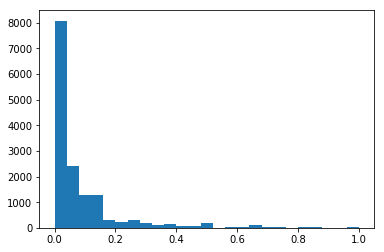

In [40]:
plt.hist(y_proba, bins=25)

(array([  2.70000000e+01,   4.00000000e+00,   9.00000000e+00,
          2.60000000e+01,   1.50000000e+01,   7.00000000e+00,
          1.70000000e+01,   1.40000000e+01,   1.08000000e+02,
          3.80000000e+01,   2.50000000e+01,   4.00000000e+00,
          1.76000000e+02,   5.30000000e+01,   8.00000000e+01,
          1.34000000e+02,   1.19000000e+02,   1.78000000e+02,
          2.99000000e+02,   2.39000000e+02,   3.23000000e+02,
          1.26400000e+03,   1.29500000e+03,   2.40300000e+03,
          8.07800000e+03]),
 array([ 0.  ,  0.04,  0.08,  0.12,  0.16,  0.2 ,  0.24,  0.28,  0.32,
         0.36,  0.4 ,  0.44,  0.48,  0.52,  0.56,  0.6 ,  0.64,  0.68,
         0.72,  0.76,  0.8 ,  0.84,  0.88,  0.92,  0.96,  1.  ]),
 <a list of 25 Patch objects>)

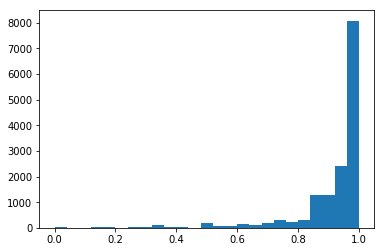

In [46]:
plt.hist(alive_proba, bins=25)

In [43]:
print('AUC score: {:.3}'.format(roc_auc_score(y_test, alive_proba)))

AUC score: 0.207


In [50]:
type(y_test.values)

numpy.ndarray

In [60]:
difference = y_proba - y_test

In [61]:
squared = np.square(difference)

In [62]:
Brier = np.mean(squared)

In [63]:
Brier

0.06443657774010965

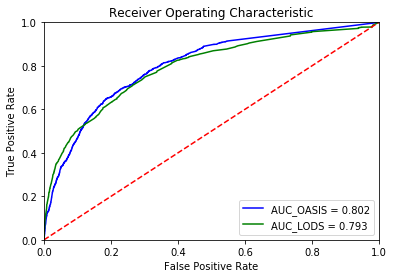

In [103]:
# calculate the fpr and tpr for all thresholds of the classification
# probs = model.predict_proba(X_test)
# preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC_OASIS = %0.3f' % roc_auc)
plt.plot(fpr_LODS, tpr_LODS, 'g', label = 'AUC_LODS = %0.3f' % roc_auc_LODS)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
# plt.figure(figsize=(30,10))
plt.show()

In [95]:
fpr_LODS, tpr_LODS, threshold = roc_curve(y_test_LODS, y_proba_LODS)
roc_auc_LODS = auc(fpr_LODS, tpr_LODS)